# 1. 앙상블 학습의 대표적인 학습 방법 3가지와 그 방법들 사이의 차이점을 서술하시오.
(1) 보팅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식, 선형회귀, K 최근접 이웃, 서포트 벡터 머신 이라는 3개의 ML 알고리즘이 겉운 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식

(2) 배깅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식, 단일 ML 알고리즘(결정 트리)로 여러 분류기가 학습으로 개별 예측을 한다.
- 부트스트래핑 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- 배깅 앙상블 방식: 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식
- 중첩 허용

(3) 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것

# 2. 보팅(Voting)의 유형 두가지와 그 들의 차이점을 서술하시오.
(1) 하드 보팅: 다수결 원칙과 비슷, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

(2) 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것

# 3. 랜덤포레스트(Random Forest)의 결과 에측 과정을 간략하게 설명하시오.
보깅의 대표적인 알고리즘
여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤, 최종적으로 모든 분류기가 보팅을 통해 예측 결정

부트스트래핑: 여러개의 데이터 세트를 중첩되게 분리하는 것 -> 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트

# 4. GBM(Gradient Boosting Machine) 알고리즘에 대해 간단히 설명하시오.
부스팅의 대표 알고리즘 중 하나

가중치 업데이트로 경사 하강법을 이용한다.

경사 하강법: 오류식 h(x) = y -F(x) 를 최소화 하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것
- 반복 수행을 통해 오류를 최소화 할 수 있도록 가중치의 업데이트 값을 도출하는 기법

# 5. XGBoost(eXtra Gradient Boost) 알고리즘애 대해 간략하게 설명하고 GBM 대비 이 알고리즘의 장점에 대해 서술하시오.
트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나

GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결하고, 병령 CPU 환경에서 병렬학습이 가능해 기존 GBM 보다 빠르게 학습을 완료할 수 있는 알고리즘

# 6. LightGBM 알고리즘애 대해 간략하게 설명하고 XGBoost 대비 이 알고리즘의 장점에 대해 서술하시오.
LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다.

LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성되어 균형 트리분할 방식보다 예측 오류 손실을 최소화 할 수 있다.

XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 것이 장점이다. 또한 메모리 사용량도 상대적으로 적다. 그렇지만 성능상의 차이는 별달리 없으면, 기능상의 다양성은 LightBGM이 더 많다.

# 7. (Coding Part) titanic.csv 데이터를 기반으로 타이타닉호 승객 생존률을 예측하는 모델을 만들고자 한다.

In [13]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv(r'C:\JupyterNotebook\titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [20]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## (a) 생존률과 다른 independent variables 간의 상관관계를 나타내시오. 생존률과 가장 correlation이 높은 두가지 variables은 무엇인가?

<AxesSubplot:>

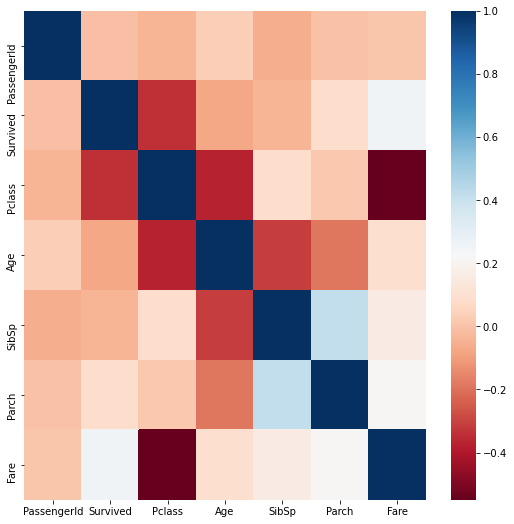

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
corr = titanic_df.corr()
sns.heatmap(corr, cmap='RdBu')

음의 상관관계가 가장 높은 것: Fare, Parch

양의 상관관계가 가장 높은 것: Pclass, Age (산 경우)

In [27]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## (b) Random Forest 알고리즘을 통해 생존률을 예측하고 모델의 정확도를 나타내시오

In [37]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(round(accuracy*100) ,'%')

85 %


## (b) Random Forest 알고리즘을 통해 생존률을 예측하고 모델의 정확도를 나타내시오

In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [4, 5, 8, 12],
    'min_samples_split' : [7, 8, 14, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}%'.format(grid_cv.best_score_ * 100)) 

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 81.8820%


## (c) GridSearchCV를 사용하여 최적의 hyper-parameter를 가진 모델을 생성하고 그 모델의 최고 예측 정확도를 나타내시오.

In [39]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=5, min_samples_split=14)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}%'.format(accuracy_score(y_test , pred)*100))

예측 정확도: 85.4749%


## (d) bar plot을 사용하여 feature importance를 나타내시오.

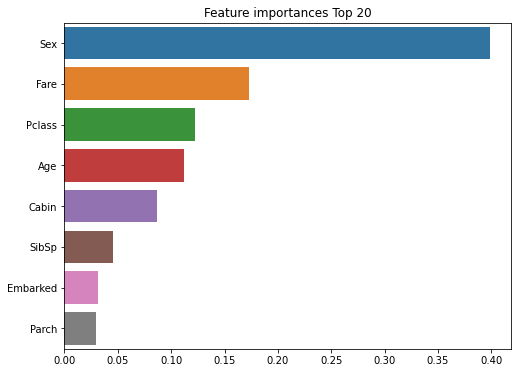

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# (e) XGBoowst 래퍼를 사용하여 생존율을 예측하고 그 모델의 정확도를 나타내시오

In [42]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [44]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [45]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds ,early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.65029	eval-logloss:0.64363
[1]	train-logloss:0.61507	eval-logloss:0.60230
[2]	train-logloss:0.58485	eval-logloss:0.56813
[3]	train-logloss:0.55821	eval-logloss:0.53851
[4]	train-logloss:0.53572	eval-logloss:0.51327
[5]	train-logloss:0.51792	eval-logloss:0.49142
[6]	train-logloss:0.50277	eval-logloss:0.47345
[7]	train-logloss:0.49016	eval-logloss:0.45833
[8]	train-logloss:0.47881	eval-logloss:0.44434
[9]	train-logloss:0.46933	eval-logloss:0.43265
[10]	train-logloss:0.46103	eval-logloss:0.42314
[11]	train-logloss:0.45191	eval-logloss:0.41294
[12]	train-logloss:0.44554	eval-logloss:0.40494
[13]	train-logloss:0.43983	eval-logloss:0.39923
[14]	train-logloss:0.43340	eval-logloss:0.39177
[15]	train-logloss:0.42893	eval-logloss:0.38741
[16]	train-logloss:0.42468	eval-logloss:0.38192
[17]	train-logloss:0.42105	eval-logloss:0.37808
[18]	train-logloss:0.41676	eval-logloss:0.37361
[19]	train-logloss:0.41293	eval-logloss:0.37122
[20]	train-logloss:0.40942	eval-logloss:0.36748
[2

In [46]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.538 0.164 0.066 0.062 0.275 0.058 0.049 0.861 0.066 0.868]
예측값 10개만 표시: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### XGBoost model의 정확도

In [48]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[111   7]
 [ 15  46]]
정확도: 0.8771, 정밀도: 0.8679, 재현율: 0.7541,    F1: 0.8070, AUC:0.8965
